In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64


In [ ]:
data = data.dropna(axis=1, thresh=int(0.8 * len(data)))
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)
data

<ipython-input-22-36ef08463be0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-22-36ef08463be0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-22-36ef08463be0>:4: FutureWarning: A value is trying to be set on a co

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [ ]:
# Convert categorical variables into numeric using Label Encoding
var_label = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    var_label[col] = le
lablenc=var_label
lablenc

{'MS Zoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'Lot Shape': LabelEncoder(),
 'Land Contour': LabelEncoder(),
 'Utilities': LabelEncoder(),
 'Lot Config': LabelEncoder(),
 'Land Slope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition 1': LabelEncoder(),
 'Condition 2': LabelEncoder(),
 'Bldg Type': LabelEncoder(),
 'House Style': LabelEncoder(),
 'Roof Style': LabelEncoder(),
 'Roof Matl': LabelEncoder(),
 'Exterior 1st': LabelEncoder(),
 'Exterior 2nd': LabelEncoder(),
 'Exter Qual': LabelEncoder(),
 'Exter Cond': LabelEncoder(),
 'Foundation': LabelEncoder(),
 'Bsmt Qual': LabelEncoder(),
 'Bsmt Cond': LabelEncoder(),
 'Bsmt Exposure': LabelEncoder(),
 'BsmtFin Type 1': LabelEncoder(),
 'BsmtFin Type 2': LabelEncoder(),
 'Heating': LabelEncoder(),
 'Heating QC': LabelEncoder(),
 'Central Air': LabelEncoder(),
 'Electrical': LabelEncoder(),
 'Kitchen Qual': LabelEncoder(),
 'Functional': LabelEncoder(),
 'Garage Type': LabelEncoder(),
 'Garage Finish': LabelEnco

In [ ]:
X = data.drop(columns=["SalePrice"],axis=1)
y = data["SalePrice"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[-1.2810083 , -0.99155697, -0.87700484, ...,  0.91884468,
         0.34164015, -0.7247024 ],
       [-0.74543215,  1.01755147,  0.06128506, ...,  0.91884468,
         0.34164015, -3.51250726],
       [ 0.51252155, -0.95408993,  0.76500248, ..., -0.60046396,
         0.34164015,  0.20456589],
       ...,
       [-0.39547511, -0.98556313,  0.06128506, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.20157999,  0.99441452, -0.17328741, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.71469268,  1.02153687,  0.64771625, ...,  0.91884468,
         0.34164015,  0.20456589]])

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define a custom dataset
class HousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_dataset = HousingDataset(X_train_tensor, y_train_tensor)
test_dataset = HousingDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
train_dataset, test_dataset, train_dataset

(<__main__.HousingDataset at 0x7c323581efe0>,
 <__main__.HousingDataset at 0x7c323581efe0>)

In [ ]:
# Define the neural network
class HousePricePredictor(nn.Module):
    def __init__(self, input_size):
        super(HousePricePredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
input_size = X_train.shape[1]
model = HousePricePredictor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50
train_losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/50, Loss: 1102706852.7568
Epoch 2/50, Loss: 1096602924.9730
Epoch 3/50, Loss: 1079101064.6486
Epoch 4/50, Loss: 1076540969.7297
Epoch 5/50, Loss: 1065751706.3784
Epoch 6/50, Loss: 1055565723.2432
Epoch 7/50, Loss: 1083294369.7297
Epoch 8/50, Loss: 1033119600.4324
Epoch 9/50, Loss: 1029955102.9189
Epoch 10/50, Loss: 1016186355.4595
Epoch 11/50, Loss: 1012842273.7297
Epoch 12/50, Loss: 1000517005.4054
Epoch 13/50, Loss: 990585524.9730
Epoch 14/50, Loss: 992128185.0811
Epoch 15/50, Loss: 981771842.5946
Epoch 16/50, Loss: 978030846.2703
Epoch 17/50, Loss: 960884343.3514
Epoch 18/50, Loss: 952848478.2703
Epoch 19/50, Loss: 946961828.7568
Epoch 20/50, Loss: 947294681.0811
Epoch 21/50, Loss: 1019812526.2703
Epoch 22/50, Loss: 931280297.5135
Epoch 23/50, Loss: 918065748.0000
Epoch 24/50, Loss: 919269561.7297
Epoch 25/50, Loss: 907490035.8919
Epoch 26/50, Loss: 903763110.4865
Epoch 27/50, Loss: 897544387.4595
Epoch 28/50, Loss: 893926052.7568
Epoch 29/50, Loss: 887341850.3784
Epoch 30/5

In [ ]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 1164477440.0000


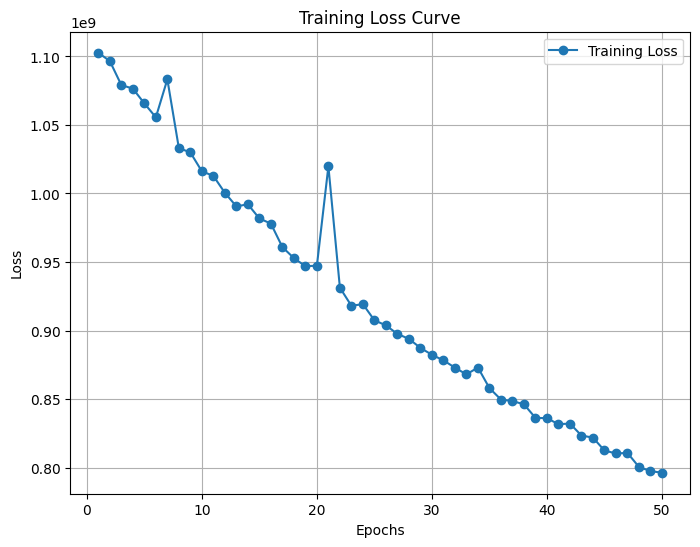

In [ ]:
# Plot training loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

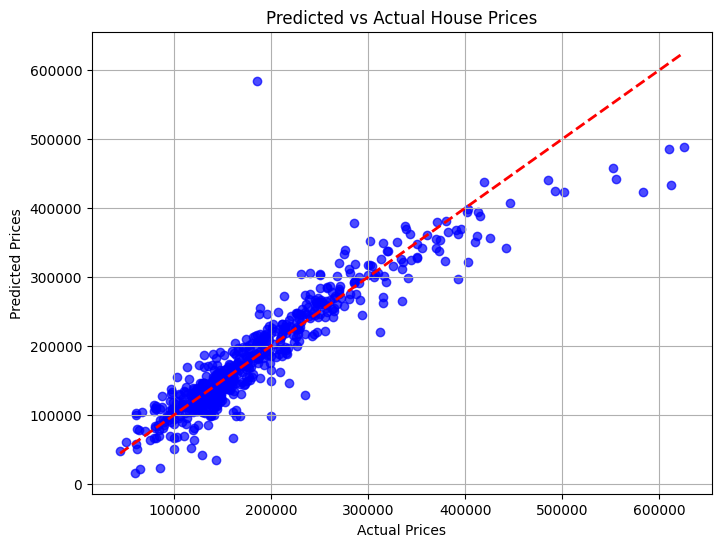

In [ ]:
test_predictions = test_predictions.numpy()
y_test_np = y_test_tensor.numpy()

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, test_predictions, alpha=0.7, color='blue')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.grid(True)
plt.show()


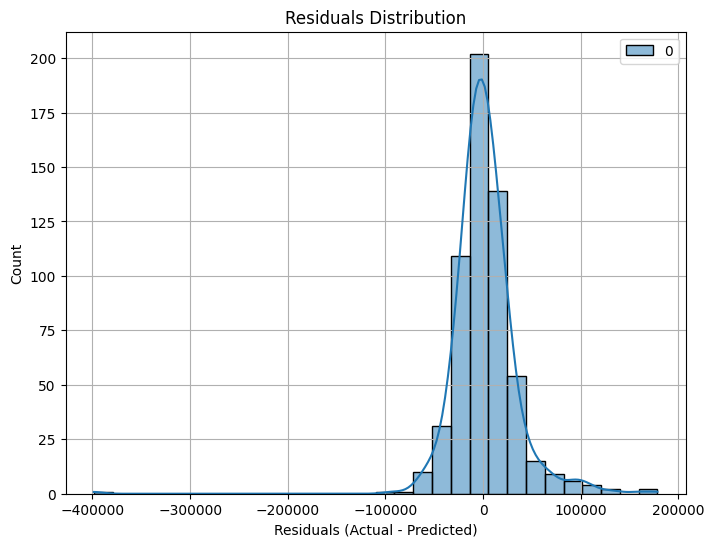

In [ ]:

# Plot residuals distribution
residuals = y_test_np - test_predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()